## This Notebook Plots Screen Correlations (FIGURE 4)

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
from scipy import stats
from scipy.stats import hypergeom
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

import Plate_Shuffling as ps
import Colony_Analysis as ca


In [1]:

import mygene

import ML_functions as ml




from goatools.obo_parser import GODag
from goatools import obo_parser
from goatools.base import download_ncbi_associations
from goatools.anno.genetogo_reader import Gene2GoReader

import matplotlib.pyplot as plt
from matplotlib_venn import venn3

import skimage.io
import importlib

#fetch path to topology functions:


from tqdm import tqdm
from matplotlib_venn import venn3, venn2
from scipy import stats

In [ ]:
1 #9.9.21. order1
2 #10.2.22 order1
3 #10.2.22 order2
4 #24.3.22 order1
5 #24.3.22 order1- CRISPR counter selection

In [10]:

ScreenA = pd.read_csv('GA1_i.csv', sep=',')
#Screen B:
Screen_B = pd.read_csv('GA6_i.csv', sep=',')
#no selection Screen:
Screen_NS = pd.read_csv('GA7_i.csv', sep=',')



### Venn Diagrams:

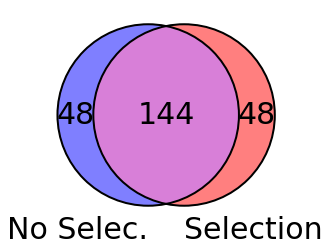

0.6 genes in common
overlap p-value: 4.2770966493609775e-181


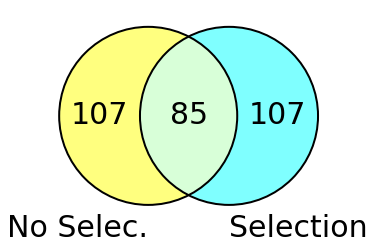

0.2842809364548495 genes in common
4162 192 192
overlap p-value: 3.215270436338364e-70


In [11]:
metric='corrected_mean_intensity.24'

#plot top common genes
i=193
X_df= ScreenA.copy()
Y_df= Screen_NS.copy()
i_nan = (X_df[ metric+'_mean'].isna()==0) & (Y_df[ metric+'_mean'].isna()==0) 
x = X_df.loc[i_nan , metric+'_mean'].argsort()

top_hits={}
top_hits[1]= set(X_df.loc[i_nan , 'gene'].iloc[x][-i:-1])

y = Y_df.loc[i_nan , metric+'_mean'].argsort()


top_hits[2]= set(Y_df.loc[i_nan , 'gene'].iloc[y][-i:-1])


V=venn2([top_hits[1], top_hits[2]], ('No Selec.', 'Selection') ,
      set_colors=([0,0,1],[1,0,0] ), alpha = 0.5)
for text in V.subset_labels:
    text.set_fontsize(30)
for text in V.set_labels:
    text.set_fontsize(30)
venn2_circles([top_hits[1], top_hits[2]])
plt.show()
prct=len(top_hits[1].intersection( top_hits[2]))/(len(top_hits[1].union( top_hits[2])))
print(prct , 'genes in common')
#compute the overlap p-value
[M, n, N] = [i_nan.sum(),i,i]
rv = hypergeom(M, n, N)
x =  len(top_hits[1].intersection( top_hits[2]))
prb = hypergeom.sf(x, M, n, N) 
print( 'overlap p-value:',prb)

i=192
#plot bottom common genes

x = X_df.loc[i_nan , metric+'_mean'].argsort()

bottom_hits={}
bottom_hits[1]= set(X_df.loc[i_nan , 'gene'].iloc[x][0:i])

y = Y_df.loc[i_nan , metric+'_mean'].argsort()


bottom_hits[2]= set(Y_df.loc[i_nan , 'gene'].iloc[y][0:i])


V= venn2([bottom_hits[1], bottom_hits[2]], ('No Selec.', 'Selection'), #'No Selec.', 'Selection'
     set_colors=([1,1,0],[0,1,1] ), alpha = 0.5)

for text in V.subset_labels:
    text.set_fontsize(30)
for text in V.set_labels:
    text.set_fontsize(30)
venn2_circles([bottom_hits[1], bottom_hits[2]])

plt.show()
prct=len(bottom_hits[1].intersection( bottom_hits[2]))/(len(bottom_hits[1].union( bottom_hits[2])))
print(prct , 'genes in common')
#compute the overlap p-value
[M, n, N] = [i_nan.sum(),i,i]
rv = hypergeom(M, n, N)
print(M, n, N)
x =  len(bottom_hits[1].intersection( bottom_hits[2]))
prb = hypergeom.sf(x, M, n, N) 
print( 'overlap p-value:',prb)

### Correlation plots

PCC, PCC_P: 0.768 0.0
corrected_mean_intensity.24


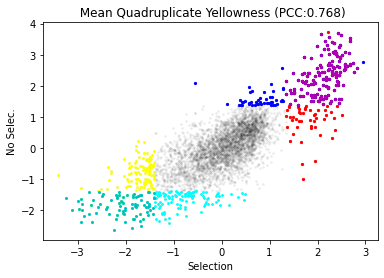

Text(0.5, 1.0, ' Mean Quadruplicate Fitness (PCC:0.704)')

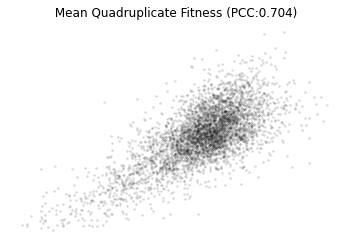

In [12]:
#color those groups on repeat1vs2 graph:
metric='corrected_mean_intensity.24'
X_df= ScreenA.copy()
Y_df= Screen_NS.copy()


i_nan= ( X_df[metric+'_mean'].isna() |  Y_df[metric+'_mean'].isna()) ==0

std_x = X_df.loc[ i_nan, metric+'_std']
std_y = Y_df.loc[ i_nan,  metric+'_std']
size=  60/((std_x +std_y)/2)

weight= np.vstack([X_df.loc[i_nan , metric+'_std'],Y_df.loc[i_nan , metric+'_std']]).max(axis=0)
weight = (weight.astype(float)*25).astype(int)

PCC, PCC_P = stats.pearsonr(X_df.loc[ i_nan, metric+'_mean'],Y_df.loc[ i_nan,metric+'_mean'])
PCC= np.round(PCC, 3)
plt.title(' Mean Quadruplicate Yellowness (PCC:' +str(PCC) +')')
plt.xlabel( 'Selection') #Selection
plt.ylabel('No Selec.',)
plt.scatter(X_df.loc[ i_nan, metric+'_mean'],Y_df.loc[ i_nan,metric+'_mean'],s=3 , alpha=0.05 , color='k' )#s=size.astype(float).values

print('PCC, PCC_P:',PCC, PCC_P)

##color top venn 

#repeat1
color_group= [ g for g in top_hits[1]]
icolor_x = X_df.loc[ i_nan, 'gene'].isin(color_group)
icolor_y = Y_df.loc[ i_nan, 'gene'].isin(color_group)
plt.scatter(X_df.loc[ i_nan, metric+'_mean'].loc[icolor_x],Y_df.loc[ i_nan,metric+'_mean'].loc[icolor_y],s=5 , alpha=1, color=[1,0,0] )#s=size.astype(float).values

#repeat2
color_group= [ g for g in top_hits[2]]
icolor_x = X_df.loc[ i_nan, 'gene'].isin(color_group)
icolor_y = Y_df.loc[ i_nan, 'gene'].isin(color_group)
plt.scatter(X_df.loc[ i_nan, metric+'_mean'].loc[icolor_x],Y_df.loc[ i_nan,metric+'_mean'].loc[icolor_y],s=5 , alpha=1, color=[0,0,1] )#s=size.astype(float).values

#common
color_group= [ g for g in top_hits[1].intersection(top_hits[2])]
icolor_x = X_df.loc[ i_nan, 'gene'].isin(color_group)
icolor_y =Y_df.loc[ i_nan, 'gene'].isin(color_group)
plt.scatter(X_df.loc[ i_nan, metric+'_mean'].loc[icolor_x],Y_df.loc[ i_nan,metric+'_mean'].loc[icolor_y],s=5 , alpha=1, color=[0.7,0,0.7]  )#s=size.astype(float).values

#
print(metric)


##color bottom venn 

#repeat1
color_group= [ g for g in bottom_hits[1]]
icolor_x = X_df.loc[ i_nan, 'gene'].isin(color_group)
icolor_y = Y_df.loc[ i_nan, 'gene'].isin(color_group)
plt.scatter(X_df.loc[ i_nan, metric+'_mean'].loc[icolor_x],Y_df.loc[ i_nan,metric+'_mean'].loc[icolor_y],s=3 , alpha=1, color=[1,1,0] )#s=size.astype(float).values

#repeat2
color_group= [ g for g in bottom_hits[2]]
icolor_x = X_df.loc[ i_nan, 'gene'].isin(color_group)
icolor_y = Y_df.loc[ i_nan, 'gene'].isin(color_group)
plt.scatter(X_df.loc[ i_nan, metric+'_mean'].loc[icolor_x],Y_df.loc[ i_nan,metric+'_mean'].loc[icolor_y],s=3 , alpha=1, color=[0,1,1] )#s=size.astype(float).values

#common
color_group= [ g for g in bottom_hits[1].intersection(bottom_hits[2])]
icolor_x = X_df.loc[ i_nan, 'gene'].isin(color_group)
icolor_y = Y_df.loc[ i_nan, 'gene'].isin(color_group)
plt.scatter(X_df.loc[ i_nan, metric+'_mean'].loc[icolor_x],Y_df.loc[ i_nan,metric+'_mean'].loc[icolor_y],s=3 , alpha=1, color='c'  )#s=size.astype(float).values
plt.show()

#plot the fitness inset:
metric='corrected_area.24'


i_nan= ( X_df[metric+'_mean'].isna() |  Y_df[metric+'_mean'].isna()) ==0

std_x = X_df.loc[ i_nan, metric+'_std']
std_y = Y_df.loc[ i_nan,  metric+'_std']
size=  60/((std_x +std_y)/2)


plt.scatter(X_df.loc[ i_nan, metric+'_mean'],Y_df.loc[ i_nan,metric+'_mean'],s=3 , alpha=0.1 , color='k' )#s=size.astype(float).values
plt.axis('off')
PCC= np.round(stats.pearsonr(X_df.loc[ i_nan, metric+'_mean'],Y_df.loc[ i_nan,metric+'_mean'])[0],3)
plt.title(' Mean Quadruplicate Fitness (PCC:' +str(PCC) +')')

